# **Trabalho 2 - Modelos Lineares**

#**Grupo:**



*   Gabriel Bezerra
*   Gabriel Calheias
*   Lucas Sá
*   Vitor Saraiva








Bibliotecas Utilizadas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

Iremos utilizar o seguinte dataset:
*   https://www.kaggle.com/datasets/iamsouravbanerjee/covid19-dataset-world-and-continent-wise?select=Covid+Data+-+South+America.csv

In [2]:
x = pd.read_csv("./CovidData-SouthAmerica.csv")
display(x)

,"Country, Other",Total Cases,Total Deaths,Total Recovered,Active Cases,Serious / Critical Condition,Total Cases / 1M Population,Deaths / 1M Population,Total Tests,Tests / 1M Population,Population
0,Brazil,"21,069,017","589,277","20,173,064","306,676","8,318","98,277","2,749","57,095,219","266,322","214,384,223"
1,Argentina,"5,234,851","114,101","5,087,120","33,630","1,614","114,557","2,497","24,252,818","530,737","45,696,487"
2,Colombia,"4,936,052","125,782","4,774,661","35,609",542,"95,776","2,441","24,920,135","483,534","51,537,524"
3,Peru,"2,164,380","198,891",NaN,NaN,"1,071","64,558","5,932","17,377,197","518,321","33,525,950"
4,Chile,"1,645,820","37,293","1,602,703","5,824",463,"85,212","1,931","21,081,270","1,091,483","19,314,333"
5,Ecuador,"505,860","32,559","443,880","29,421",759,"28,156","1,812","1,798,012","100,078","17,966,183"
6,Bolivia,"496,032","18,616","448,704","28,712",220,"41,806","1,569","2,349,096","197,983","11,865,122"
7,Paraguay,"459,524","16,120","441,169","2,235",40,"63,485","2,227","1,810,321","250,104","7,238,263"
8,Uruguay,"387,299","6,046","379,573","1,680",13,"111,029","1,733","3,480,276","997,706","3,488,277"
9,Venezuela,"352,055","4,261","336,034","11,760",681,"12,423",150,"3,359,014","118,532","28,338,512"


Serão utilizadas as colunas "Total Cases", "Total Deaths" e "Total Recovered" e serão desconsideradas as linhas das "Falkland Islands" e "Total".

In [3]:
dataset = pd.read_csv("CovidData-SouthAmerica.csv")
newdataset = dataset.drop(columns = ['Active Cases', 'Serious / Critical Condition','Total Cases / 1M Population','Deaths / 1M Population','Total Tests','Tests / 1M Population','Population'])
display(newdataset)

TotalCases = dataset.loc[:,"Total Cases"]
TotalDeaths = dataset.loc[:,"Total Deaths"]
TotalRecovered = dataset.loc[:,"Total Recovered"]

,"Country, Other",Total Cases,Total Deaths,Total Recovered
0,Brazil,"21,069,017","589,277","20,173,064"
1,Argentina,"5,234,851","114,101","5,087,120"
2,Colombia,"4,936,052","125,782","4,774,661"
3,Peru,"2,164,380","198,891",NaN
4,Chile,"1,645,820","37,293","1,602,703"
5,Ecuador,"505,860","32,559","443,880"
6,Bolivia,"496,032","18,616","448,704"
7,Paraguay,"459,524","16,120","441,169"
8,Uruguay,"387,299","6,046","379,573"
9,Venezuela,"352,055","4,261","336,034"


## **a) Faça o gráfico de dispersão bidimensional (XY) entre a variável y e cada uma das variáveis regressoras X1,..., Xp (p gráficos separados)**



In [4]:
TotalCases = [21069017, 5234851, 4936052, 2164380, 1645820, 505860, 496032, 459524, 387299, 352055, 38021, 35817, 28831]
TotalDeaths = [589277, 114101, 125782, 198891, 37293, 32559, 18616, 16120, 6046, 4261, 232, 788, 703]
TotalRecovered = [20173064, 5087120, 4774661, 1602703, 0, 443880, 448704, 441169, 379573, 336034, 9995, 26334, 24756]

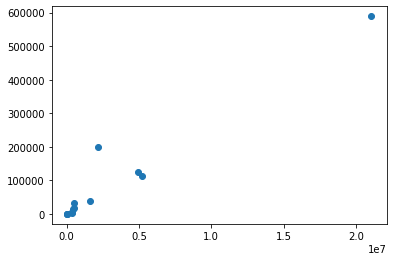

In [5]:
plt.scatter(TotalCases, TotalDeaths)
plt.show()

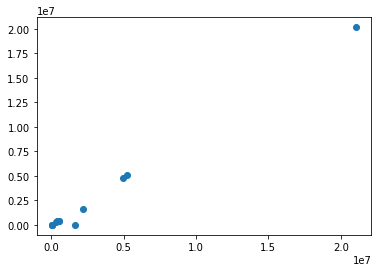

In [6]:
plt.scatter(TotalCases, TotalRecovered)
plt.show()

## **b) Estime a correlação entre a variável Y e cada uma das variáveis regressoras (ρ(Y,Xi)). Comente.**



Nos dois casos temos uma relação de correlação positiva, com uma
correlação forte em ambos os caso sendo a correlação entre "Total Cases" x "Total Recovered" ligeraimente melhor que "Total Cases" x "Total Deaths".

In [8]:
medY = np.mean(TotalCases)
medX2 = np.mean(TotalRecovered)
medX1 = np.mean(TotalDeaths)


num, denx1, deny = 0, 0, 0
num2, denx2 = 0, 0

for i in range(0,12):
  
  num = num + (TotalDeaths[i] - medX1) * (TotalCases[i] - medY) 
  denx1 = denx1 + ((TotalDeaths[i] - medX1) ** 2)

  num2 = num2 + (TotalRecovered[i] - medX2) * (TotalCases[i] -  medY)
  denx2 = denx2 + ((TotalRecovered[i] - medX2) ** 2)
  
  deny = deny + ((TotalCases[i] - medY) ** 2)

den = math.sqrt(denx1 * deny)
den2 = math.sqrt(denx2 * deny)

result1 = num / den
result2 = num2 / den2

print("Coeficiente de Correlação Total Cases x Total Deaths: ",result1)
print("Coeficiente de Correlação Total Cases x Total Recovered: ", result2)

Coeficiente de Correlação Total Cases x Total Deaths:  0.9674779430453133
Coeficiente de Correlação Total Cases x Total Recovered:  0.9967712225619804


# **c) Calcule o coeficiente de determinação R2(Y,Xi) entre a variável Y e cada uma das variáveis regressoras. Comente o resultado.**

O coeficiente de determinação indica quanto o modelo foi capaz de explicar
os dados, vemos que "Total Recovered" melhor explica os dados de "Total Cases", e "Total Deaths" explica ligeiramente menos.

In [19]:
Sxy1, Sx1, Sy, Sxx1, Syy = 0, 0, 0, 0, 0
Sxy2, Sx2, Sxx2,= 0, 0, 0
num1r2, num2r2, den1r2, den2r2 = 0, 0, 0, 0
n = 13
for i in range(0,n):
  Sxy1 = Sxy1 + (TotalCases[i]*TotalDeaths[i])
  Sx1 = Sx1 + TotalDeaths[i] 
  Sxx1 = Sxx1 + (TotalDeaths[i] ** 2)
  
  Sxy2 = Sxy2 + (TotalCases[i]*TotalRecovered[i])
  Sx2 = Sx2 + TotalRecovered[i]
  Sxx2 = Sxx2 + (TotalRecovered[i] ** 2)
  
  Sy = Sy + TotalCases[i]
  Syy = Syy + (TotalCases[i] ** 2)

num1r2 = ((n*Sxy1) - (Sx1*Sy))
num2r2 = ((n*Sxy2) - (Sx2*Sy))
den1r2 = (math.sqrt((n*Sxx1) - Sx1**2))*(math.sqrt((n*Syy) - Sy**2))
den2r2 = (math.sqrt((n*Sxx2) - Sx2**2))*(math.sqrt((n*Syy) - Sy**2))

print("Coeficiente de Determinação Total Cases x Total Deaths: ", (num1r2/den1r2)**2)
print("Coeficiente de Determinação Total Cases x Total Recovered: ", (num2r2/den2r2)**2)

Coeficiente de Determinação Total Cases x Total Deaths:  0.9372661329975657
Coeficiente de Determinação Total Cases x Total Recovered:  0.9935860440560893


## **d) Encontre o hiperplano de quadrados mínimos (estime β0, β1, ..., βp).**

In [18]:
Y = np.array(TotalCases)
X = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1], TotalDeaths, TotalRecovered])

Xt = X.T
Inversa = np.linalg.inv(np.matmul(X, Xt))
mult1 = np.matmul(X, Y)

β = np.matmul(Inversa, mult1)

print("β0 =", β[0])
print("β1 =", β[1])
print("β2 =", β[2])

β0 = 130900.11366371159
β1 = 4.537834420328977
β2 = 0.9024992726023058


# **e) Calcule os valores estimados de y (ou seja, ŷ) através do hiperplano estimado no item anterior.**

In [15]:
Ychapeu = []
numr2, denr2 = 0, 0
for i in range(0,12):
  Ychapeu.append(β[0] + β[1]*TotalDeaths[i] + β[2]*TotalRecovered[i])

print("Y Calculado:")
for j in Ychapeu:
  print(j)

Y Calculado:
21011117.15353167
5239793.65849831
5010806.082144129
2479872.8310548957
300129.57270104013
679248.8416779143
620331.4728463008
602204.7061141013
500900.21696849563
453506.26669837657
140973.37147888797
158242.34303163993


# **f) Calcule os resíduos, ou seja, o erro de estimação y-ŷ.**

In [16]:
residuos = []
numr2, denr2 = 0, 0
for i in range(0,12):
  residuos.append(TotalCases[i] - Ychapeu[i])

print("Resíduos:")
for j in residuos:
  print(j)

Resíduos:
57899.84646832943
-4942.658498309553
-74754.08214412909
-315492.83105489565
1345690.4272989598
-173388.84167791426
-124299.4728463008
-142680.70611410134
-113601.21696849563
-101451.26669837657
-102952.37147888797
-122425.34303163993


# **g) Faça o histograma dos erros de estimação encontrados no item anterior. Comente sobre sua característica.**

O maior valor no histograma é referente ao "Peru", que tem a ausência de dados sobre "Total Recovered". Já o segundo maior valor é referente ao "Brazil", que mesmo tendo uma relação de quase 1 para 1 em comparação do valor "Total Cases" e o "Y Calculado" ainda possuí uma diferença muito grande em relação aos demais.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


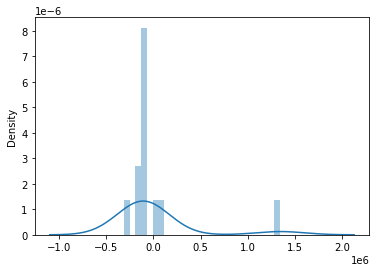

In [17]:
sns.distplot(residuos, kde = True, rug = False, hist = True)